# Este notebook ilustra como o campo gravitacional se altera em função de uma redistribuição de massa

In [1]:
#source1: https://neuronvisio.readthedocs.org/en/latest/gettingstarted.html#troubleshooting
#source2: http://ipython.org/ipython-doc/dev/interactive/reference.html#pyqt-and-pyside

import sip
sip.setapi('QString', 2)
sip.setapi('QVariant', 2)

In [2]:
%matplotlib inline
import numpy as np
from fatiando.vis import mpl, myv
from fatiando import gridder, mesher, gravmag, utils
from fatiando.gravmag import prism

## Cálculo do potencial gravitacional $V_{n}(x,y,z)$ produzido por um cubo homogêneo. Este cubo será denominado *cubo normal* (CN)

### Contrução do CN com aresta $L$

In [3]:
L = 1000000

#modelo 3D
z0 = -0.5*L
rhon = 1000
CN = [mesher.Prism(-0.5*L, 0.5*L, -0.5*L, 0.5*L, z0, z0+L, props={'density': rhon})]

MCN = 1000.0*L**3

#modelo 2D
CN2D = [mesher.Polygon([[ 0.5*L, -0.5*L], 
                        [ 0.5*L,  0.5*L], 
                        [-0.5*L,  0.5*L], 
                        [-0.5*L, -0.5*L]])]

### Conjunto de pontos sobre os quais o potencial será calculado

In [ ]:
lambida = 0.2*L
area = [-lambida+z0, z0+lambida, 
        -lambida, lambida]
shape = (100,100)

z, y, x = gridder.regular(area, shape, z = 0.0)

bounds = [-0.5*L, 0.5*L, -0.5*L, 0.5*L, -0.5*L, 0.5*L] # Limites da região de visualização 3D
myv.figure(size=(800,800))
myv.prisms(CN, prop='density', opacity = 0.5)
myv.points(np.vstack((x, y, z)).T, color=(1, 0, 0), size=5000, opacity=1)
ax = myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.0f')
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.0
myv.savefig('CN.png')
myv.show()

<img src='CN.png', width=600>

### Na figura acima, o CN está representado em azul e os pontos sobre os quais o potencial será calculado estão em vermelho. Observe que estes pontos estão sobre um plano com metade da área dentro e metade da área fora do CN

### Cálculo do potencial gravitacional $V_{n}(x,y,z)$ produzido pelo CN. Por conveniência, $V_{n}(x,y,z)$ será denominado *potencial gravitacional normal*

In [5]:
Vn = prism.potential(x,y,z,CN)

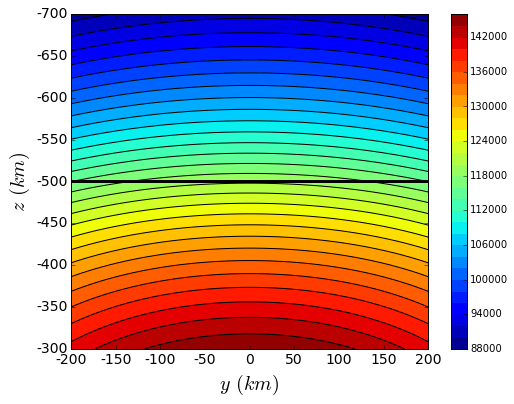

In [6]:
mpl.close('all')
mpl.figure(figsize=(8,6))
nlevels=mpl.contourf(y, z, Vn, shape, 30)
mpl.colorbar()
mpl.contour(y, z, Vn, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CN2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()
mpl.show()

### As equipontenciais do *cubo normal* (CN) são funções da distribuição de massa dentro deste. É possível redistribuir a massa dentro do volume do cubo normal de tal forma que o potencial gravitacional seja igual (ou muito próximo) ao potencial $V_{n}(x,y,z)$. Dessa forma, ao redistribuir a massa, é possível criar heterogeneidades locais de massa em relação ao CN. Estas heterogeneidades locais são denominadas *massas anômalas*

### Construção de um cubo CA com distribuição de massa diferente daquela do CN, mas que produz um potencial $V_{a}(x,y,z) \approx V_{n}(x,y,z)$

In [ ]:
#modelo 3D
CA = list(CN)

la = 0.05*L
rhoa = 10000

X11 = -0.5*la
X12 = 0.5*la
Y11 = -0.5*la
Y12 = 0.5*la
Z11 = z0-la
Z12 = z0

X21 = -0.5*la
X22 = 0.5*la
Y21 = -0.5*la
Y22 = 0.5*la
Z21 = z0+L-la
Z22 = z0+L

CA.append(mesher.Prism(X11, X12, Y11, Y12, Z11, Z12, props={'density': rhoa}))
CA.append(mesher.Prism(X21, X22, Y21, Y22, Z21, Z22, props={'density': -rhoa}))

#modelo 2D
CA2D = list(CN2D)
CA2D.append(mesher.Polygon([[Y11, Z11], 
                            [Y12, Z11], 
                            [Y12, Z12], 
                            [Y11, Z12]]))
CA2D.append(mesher.Polygon([[Y21, Z21], 
                            [Y22, Z21], 
                            [Y22, Z22], 
                            [Y21, Z22]]))

myv.figure(size=(800,800))
myv.prisms([CA[0]], prop='density', opacity = 0.3)
myv.prisms([CA[1]], prop='density', opacity = 1)
myv.prisms([CA[2]], prop='density', opacity = 1)
#myv.points(np.vstack((x, y, z)).T, color=(1, 0, 0), size=5000, opacity=1)
ax = myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.0f')
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.0
myv.savefig('CA.png')
myv.show()

<img src='CA.png', width=600>

### A figura acima mostra o modelo CA. Este modelo é composto pelo CN (azul transparente) e duas heterogeneidades de massa em relação ao CN (cubinhos azuis sólidos). Estas heterogeneidades de massa (massas anômalas) em relação ao CN possuem a mesma densidade, mas com o sinal oposto. Assim, a massa do modelo CA é a mesma daquela do modelo CN. A massa anômala localizada na parte superior simula um alto topográfico e possui densidade positiva. A massa anômala localizada na parte inferior está localizada dentro do cubo maior e possui densidade negativa.

### Cálculo do potencial gravitacional $V_{a}(x,y,z)$

In [8]:
Va = prism.potential(x, y, z, CA)

c:\Anaconda\lib\site-packages\matplotlib\figure.py:1644: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


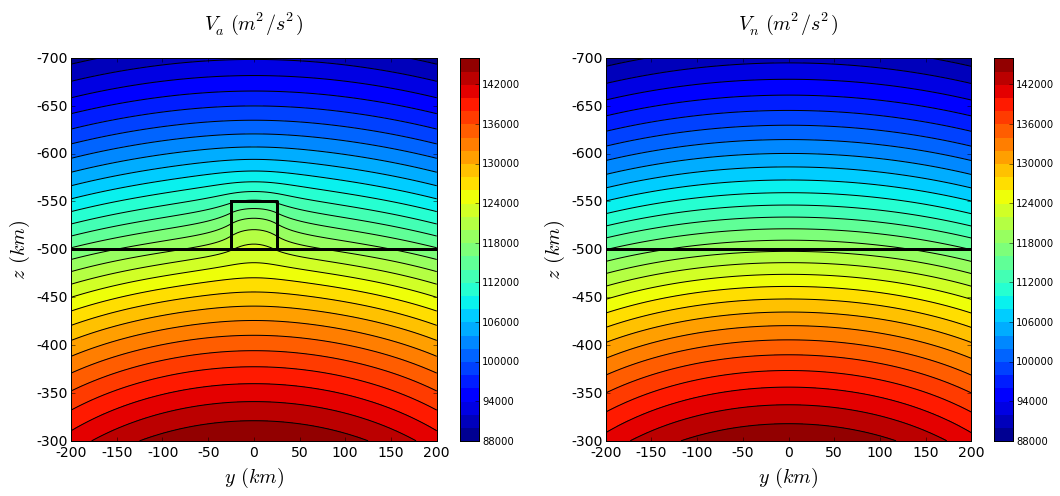

In [9]:
mpl.close('all')
mpl.figure(figsize=(15,7), tight_layout=True)
mpl.subplot(1,2,1)
mpl.title('$V_{a} \, (m^{2}/s^{2})$\n', fontsize=20)
nlevels = mpl.contourf(y, z, Va, shape, 30)
mpl.colorbar()
mpl.contour(y, z, Va, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CA2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(1,2,2)
mpl.title('$V_{n} \, (m^{2}/s^{2})$\n', fontsize=20)
mpl.contourf(y, z, Vn, shape, nlevels)
mpl.colorbar()
mpl.contour(y, z, Vn, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CN2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

### A figura acima mostra o pontencial $V_{a}$ e $V_{n}$ calculados sobre o plano mostrado anteriormente. Observe o deslocamento das equipotenciais de $V_{a}$ em relação as equipotenciais de $V_{n}$ nas proximidades da massa anômala com densidade positiva. Em comparação com o modelo CN, esta massa anômala no modelo CA representa um excesso local de massa. 

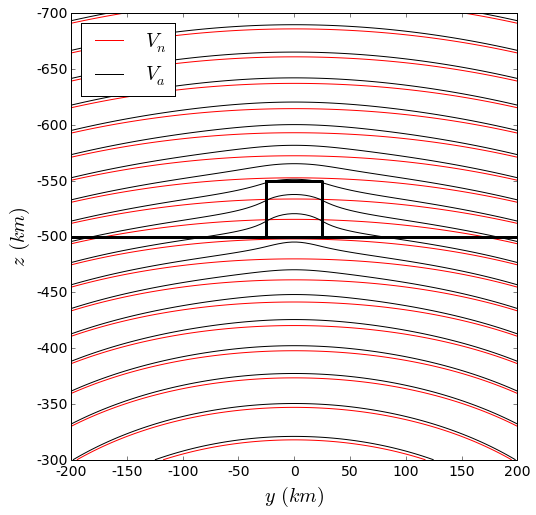

In [10]:
mpl.close('all')
mpl.figure(figsize=(8,8))
nlevels = mpl.contour(y, z, Vn, shape, 20, color='r', 
                      linewidth=1, clabel=False, label='$V_{n}$')
mpl.contour(y, z, Va, shape, nlevels, color='k', 
            linewidth=1, clabel=False, label='$V_{a}$')
for i, p in enumerate(CA2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='upper left', fontsize=20)
mpl.m2km()
mpl.show()

### A figura acima mostra o deslocamento das equipotenciais de $V_{a}$ em relação as equipotenciais de $V_{n}$

### Construção de um cubo CB com distribuição de massa diferente daquela do CN, mas que produz um potencial $V_{b}(x,y,z) \approx V_{n}(x,y,z)$

In [ ]:
#modelo 3D
CB = list(CN)

lb = 0.05*L
rhob = 10000

X11 = -0.5*lb
X12 = 0.5*lb
Y11 = -0.5*lb
Y12 = 0.5*lb
Z11 = z0
Z12 = z0+lb

X21 = -0.5*lb
X22 = 0.5*lb
Y21 = -0.5*lb
Y22 = 0.5*lb
Z21 = z0+L-lb
Z22 = z0+L

CB.append(mesher.Prism(X11, X12, Y11, Y12, Z11, Z12, props={'density': -rhob}))
CB.append(mesher.Prism(X21, X22, Y21, Y22, Z21, Z22, props={'density': rhob}))

#modelo 2D
CB2D = list(CN2D)
CB2D.append(mesher.Polygon([[Y11, Z11], 
                            [Y12, Z11], 
                            [Y12, Z12], 
                            [Y11, Z12]]))
CB2D.append(mesher.Polygon([[Y21, Z21], 
                            [Y22, Z21], 
                            [Y22, Z22], 
                            [Y21, Z22]]))

myv.figure(size=(800,800))
myv.prisms([CB[0]], prop='density', opacity = 0.3)
myv.prisms([CB[1]], prop='density', opacity = 1)
myv.prisms([CB[2]], prop='density', opacity = 1)
#myv.points(np.vstack((x, y, z)).T, color=(1, 0, 0), size=5000, opacity=1)
ax = myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.0f')
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.0
myv.savefig('CB.png')
myv.show()

<img src='CB.png', width=600>

### Analogamente ao modelo CA, o modelo CB é composto pelo CN (azul transparente) e duas heterogeneidades de massa em relação ao CN (cubinhos azuis sólidos). Estas heterogeneidades de massa (massas anômalas) em relação ao CN possuem a mesma densidade, mas com o sinal oposto. Assim, a massa do modelo CB é a mesma daquela do modelo CN. A massa anômala localizada na parte superior possui densidade negativa. A massa anômala localizada na parte inferior possui densidade positiva. Diferente do modelo CA, as duas massas anômalas do modelo CB estão no interior do cubo maior (azul transparente).

### Cálculo do potencial gravitacional $V_{b}(x,y,z)$

In [12]:
Vb = prism.potential(x, y, z, CB)

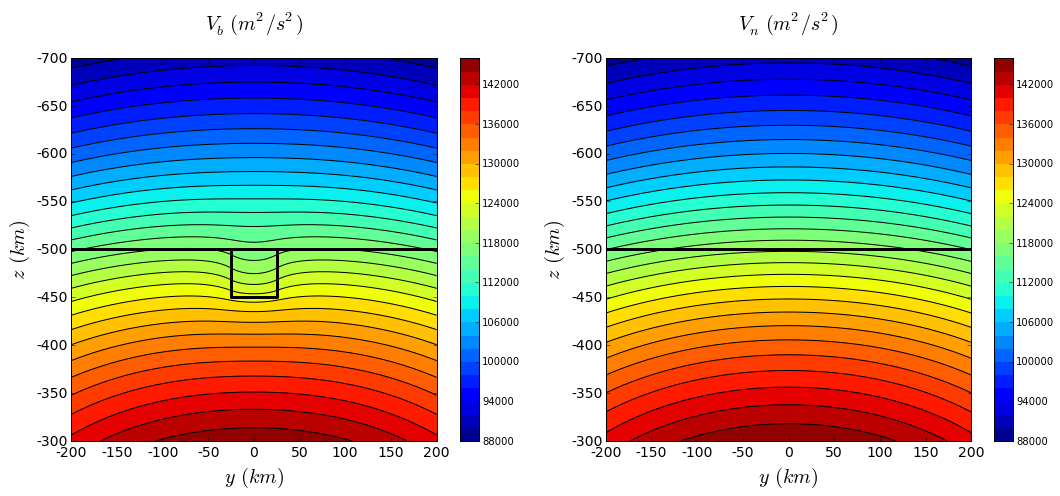

In [13]:
mpl.close('all')
mpl.figure(figsize=(15,7), tight_layout=True)
mpl.subplot(1,2,1)
mpl.title('$V_{b} \, (m^{2}/s^{2})$\n', fontsize=20)
nlevels = mpl.contourf(y, z, Vb, shape, 30)
mpl.colorbar()
mpl.contour(y, z, Vb, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CB2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(1,2,2)
mpl.title('$V_{n} \, (m^{2}/s^{2})$\n', fontsize=20)
mpl.contourf(y, z, Vn, shape, nlevels)
mpl.colorbar()
mpl.contour(y, z, Vn, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CN2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

### A figura acima mostra o pontencial $V_{b}$ e $V_{n}$ calculados sobre o plano mostrado anteriormente. Observe o deslocamento das equipotenciais de $V_{b}$ em relação as equipotenciais de $V_{n}$ nas proximidades da massa anômala com densidade negativa. Em comparação com o modelo CN, esta massa anômala no modelo CB representa uma deficiência local de massa. 

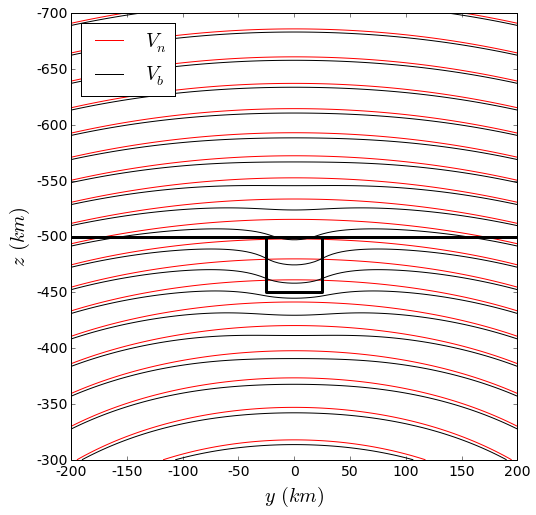

In [14]:
mpl.close('all')
mpl.figure(figsize=(8,8))
nlevels = mpl.contour(y, z, Vn, shape, 20, color='r', 
                      linewidth=1, clabel=False, label='$V_{n}$')
mpl.contour(y, z, Vb, shape, nlevels, color='k', 
            linewidth=1, clabel=False, label='$V_{b}$')
for i, p in enumerate(CB2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='upper left', fontsize=20)
mpl.m2km()
mpl.show()

### A figura acima mostra o deslocamento das equipotenciais de $V_{b}$ em relação as equipotenciais de $V_{n}$

### Construção de um cubo CC com distribuição de massa diferente daquela do CN, mas que produz um potencial $V_{c}(x,y,z) \approx V_{n}(x,y,z)$

In [ ]:
#modelo 3D
CC = list(CN)

lc = 0.05*L
rhoc = 10000

X11 = -0.5*lc
X12 = 0.5*lc
Y11 = -0.5*lc
Y12 = 0.5*lc
Z11 = z0-lc
Z12 = z0

X21 = -0.5*lc
X22 = 0.5*lc
Y21 = -0.5*lc
Y22 = 0.5*lc
Z21 = z0
Z22 = z0+lc

CC.append(mesher.Prism(X11, X12, Y11, Y12, Z11, Z12, props={'density': rhoc}))
CC.append(mesher.Prism(X21, X22, Y21, Y22, Z21, Z22, props={'density': -rhoc}))

#modelo 2D
CC2D = list(CN2D)
CC2D.append(mesher.Polygon([[Y11, Z11], 
                            [Y12, Z11], 
                            [Y12, Z12], 
                            [Y11, Z12]]))
CC2D.append(mesher.Polygon([[Y21, Z21], 
                            [Y22, Z21], 
                            [Y22, Z22], 
                            [Y21, Z22]]))

myv.figure(size=(800,800))
myv.prisms([CC[0]], prop='density', opacity = 0.3)
myv.prisms([CC[1]], prop='density', opacity = 1)
myv.prisms([CC[2]], prop='density', opacity = 1)
#myv.points(np.vstack((x, y, z)).T, color=(1, 0, 0), size=5000, opacity=1)
ax = myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.0f')
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.0
myv.savefig('CC.png')
myv.show()

<img src='CC.png', width=600>

### Analogamente ao modelo CA, o modelo CC é composto pelo CN (azul transparente) e duas heterogeneidades de massa em relação ao CN (cubinhos azuis sólidos). Estas heterogeneidades de massa (massas anômalas) em relação ao CN possuem a mesma densidade, mas com o sinal oposto. Assim, a massa do modelo CC é a mesma daquela do modelo CN. Diferentemente do modelo CA, as massas anômalas do modelo CC estão verticalmente justapostas. A massa anômala localizada na parte superior possui densidade positiva. A massa anômala localizada na parte inferior possui densidade negativa.

### Cálculo do potencial gravitacional $V_{c}(x,y,z)$

In [16]:
Vc = prism.potential(x, y, z, CC)

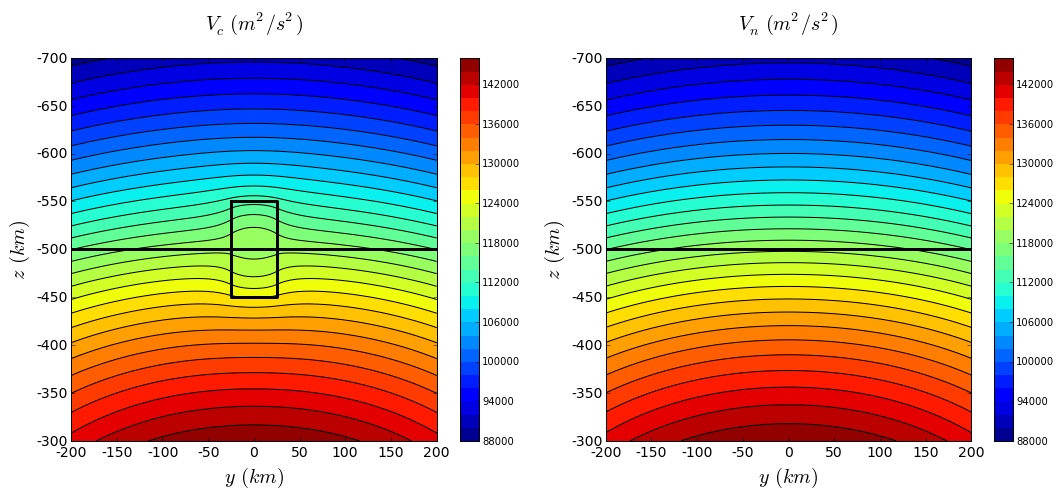

In [17]:
mpl.close('all')
mpl.figure(figsize=(15,7), tight_layout=True)
mpl.subplot(1,2,1)
mpl.title('$V_{c} \, (m^{2}/s^{2})$\n', fontsize=20)
nlevels = mpl.contourf(y, z, Vc, shape, 30)
mpl.colorbar()
mpl.contour(y, z, Vc, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CC2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(1,2,2)
mpl.title('$V_{n} \, (m^{2}/s^{2})$\n', fontsize=20)
mpl.contourf(y, z, Vn, shape, nlevels)
mpl.colorbar()
mpl.contour(y, z, Vn, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
for i, p in enumerate(CN2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

### A figura acima mostra o pontencial $V_{c}$ e $V_{n}$ calculados sobre o plano mostrado anteriormente. Observe o deslocamento das equipotenciais de $V_{c}$ em relação as equipotenciais de $V_{n}$ nas proximidades das massas anômalas. Em comparação com o modelo CN, a massa anômala localizada na parte superior representa um excesso local de massa. Por outro lado, a massa anômala localizada na parte inferior representa uma deficiência local de massa. 

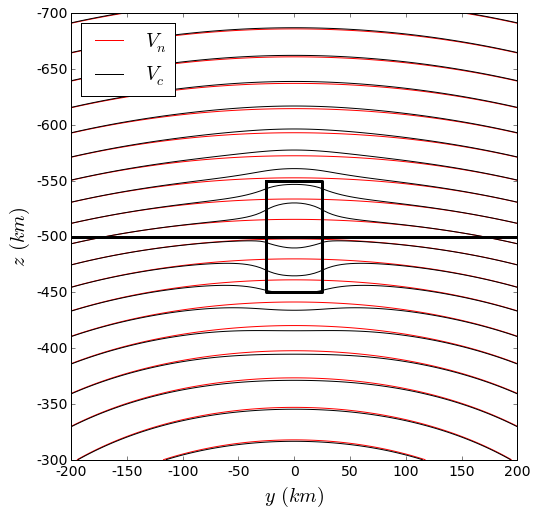

In [18]:
mpl.close('all')
mpl.figure(figsize=(8,8))
nlevels = mpl.contour(y, z, Vn, shape, 20, color='r', 
                      linewidth=1, clabel=False, label='$V_{n}$')
mpl.contour(y, z, Vc, shape, nlevels, color='k', 
            linewidth=1, clabel=False, label='$V_{c}$')
for i, p in enumerate(CC2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='upper left', fontsize=20)
mpl.m2km()
mpl.show()

### A figura acima mostra o deslocamento das equipotenciais de $V_{c}$ em relação as equipotenciais de $V_{n}$

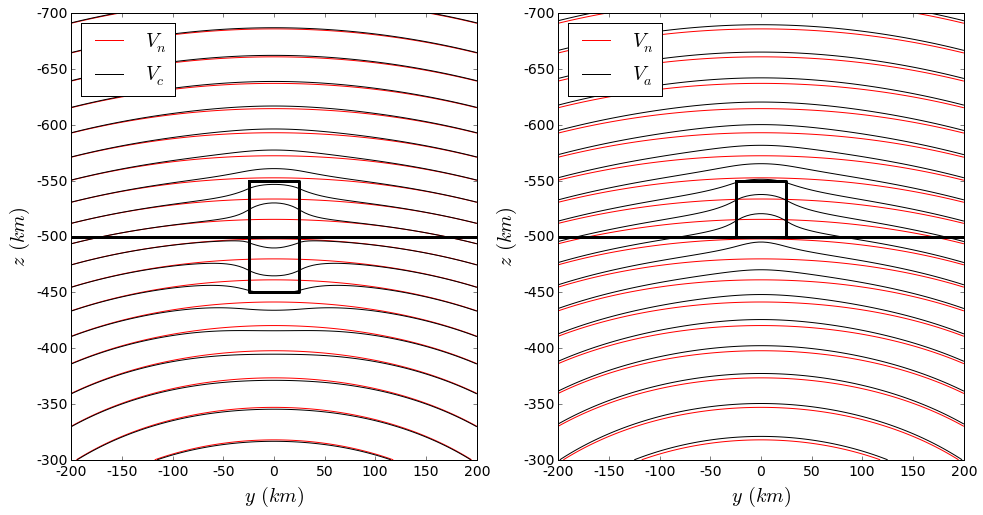

In [19]:
mpl.close('all')
mpl.figure(figsize=(16,8))
mpl.subplot(1, 2, 1)
nlevels = mpl.contour(y, z, Vn, shape, 20, color='r', 
                      linewidth=1, clabel=False, label='$V_{n}$')
mpl.contour(y, z, Vc, shape, nlevels, color='k', 
            linewidth=1, clabel=False, label='$V_{c}$')
for i, p in enumerate(CC2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='upper left', fontsize=20)
mpl.m2km()
mpl.subplot(1, 2, 2)
mpl.contour(y, z, Vn, shape, nlevels, color='r', 
            linewidth=1, clabel=False, label='$V_{n}$')
mpl.contour(y, z, Va, shape, nlevels, color='k', 
            linewidth=1, clabel=False, label='$V_{a}$')
for i, p in enumerate(CA2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.xlim(area[2], area[3])
mpl.ylim(area[1], area[0])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='upper left', fontsize=20)
mpl.m2km()
mpl.show()

### A figura acima mostra (à esquerda) o deslocamento das equipotenciais de $V_{c}$ (produzido pelo modelo CC) em relação as equipotenciais de $V_{n}$ e (à direita) o deslocamento das equipotenciais de $V_{a}$ (produzido pelo modelo CA) em relação as equipotenciais de $V_{n}$. As massas anômalas do modelo CC e do modelo CA possuem as mesmas densidades. Em ambos os modelos, a massa anômala na parte superior possui densidade positiva e a massa anômala na parte inferior possui densidade negativa. Observe que, nas proximidade da massa anômala positiva, há um deslocamento para cima (direção $z$ negativa) das equipotenciais de $V_{c}$ e $V_{a}$. Contudo, o deslocamento observado no modelo CC é menor do que o obervado no modelo CA. Esta atenuação no modelo CC é causada pela proximidade da massa anômala negativa. Enquanto no modelo CC as massa anômalas estão próximas (verticalmente justapostas), no modelo CA as massas anômalas estão distantes. O efeito das massas anômalas no modelo CC se sobrepõe, mas no modelo CA não.

### Nesta simulação, os potenciais gravitacionais $V_{n}$, $V_{a}$, $V_{b}$ e $V_{c}$ são diferenciáveis em qualquer ponto $(x, y, z)$. Dessa forma, é possível calcular o gradiente destes potenciais em qualquer ponto. O gradiente destes potenciais é o *vetor aceleração gravitacional* $\mathbf{g}$, com componentes $g_{x}$, $g_{y}$ e $g_{z}$. No modelo CA, por exemplo, o *vetor aceleração gravitacional* $\mathbf{g}_{a}$ pode ser representado pela soma entre o efeito gravitacional produzido pelas massas anômalas (cubinhos na parte superior e inferior) e o efeito produzido pelo cubo maior, que é igual ao CN. Aqui, o modelo CN é análogo ao modelo de Terra Normal (utilizado para descrever o campo de gravidade) enquanto os modelos CA, CB e CC representam a Terra Verdadeira. 

### Em geofísica, na área de gravimetria, é comum medirmos a gravidade na superfície da Terra e descontar o valor da gravidade normal, que é aquela produzida por um modelo de referência denominado modelo de Terra Normal. A gravidade possui uma componente gravitacional e outra centrífuga, que é causada pela rotação do planeta. A diferença entre a gravidade e a gravidade normal em um mesmo ponto na superfície da Terra (distúrbio de gravidade) é utilizada para investigar as variações na distribuição de densidades em subsuperfície, que estão associadas a diferentes estruturas geológicas.

### Nesta simulação, só foi considerada a parcela gravitacional. A parte centrífuga NÃO foi considerada

### Cálculo da componente vertical $z$ da aceleração gravitacional exercida por todos os modelos (CN, CA, CB e CC). A diferença entre a componente vertical da aceleração gravitacional produzida por um modelo (CA, CB ou CC) e a componente vertical da aceleração gravitacional exercida pelo *cubo normal* (CN) simula o distúrbio de gravidade $\delta g$. Aqui, Esta diferença será denominada *distúrbio gravitacional* $d$

### Conjunto de pontos sobre os quais a componente vertical $z$ da aceleração gravitacional será calculada. Este conjunto de planos é um plano com coordenada vertical constante, localizado acima das massas.

In [21]:
lambida = 0.2*L
area = [-lambida, lambida, 
        -lambida, lambida]
shape = (101,101)

xp, yp, zp = gridder.regular(area, shape, z = -1.2*la+z0)
perfil = (xp == 0.0)

### Cálculo da componente $z$ (vertical) da aceleração gravitacional

In [22]:
gn = prism.gz(xp, yp, zp, CN)

ga = prism.gz(xp, yp, zp, CA)

gb = prism.gz(xp, yp, zp, CB)

gc = prism.gz(xp, yp, zp, CC)

### Cálculo do distúrbio gravitacional

In [23]:
da = ga - gn
db = gb - gn
dc = gc - gn

### Componente $z$ (vertical) da aceleração gravitacional $g_{a}$ e distúrbio gravitacional $d_{a}$

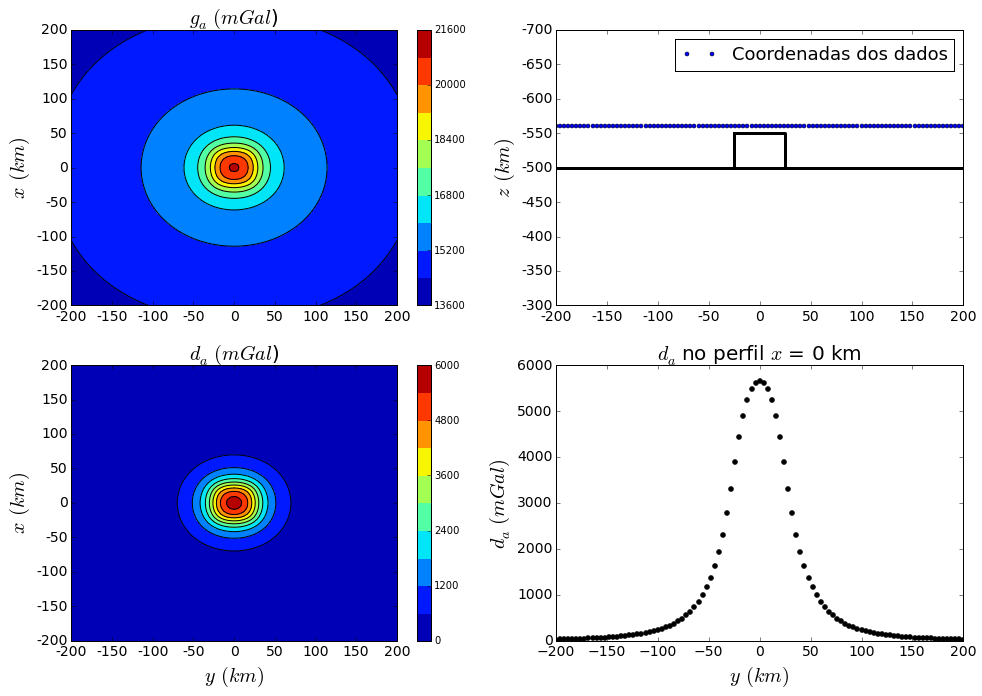

In [24]:
mpl.close('all')
mpl.figure(figsize=(14,10))

mpl.subplot(2,2,1)
mpl.title('$g_{a} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, ga, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, ga, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
#mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,2)
for i, p in enumerate(CA2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.plot(yp[perfil], zp[perfil], 'bo', markersize=4,
         label='Coordenadas dos dados')
mpl.xlim(area[2], area[3])
mpl.ylim(lambida+z0, -lambida+z0)
#mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='best', fontsize=18)
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title('$d_{a} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, da, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, da, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14, )
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,4)
mpl.title('$d_{a}$ no perfil $x$ = 0 km', fontsize=20)
mpl.plot(0.001*yp[perfil], da[perfil], 'ko', markersize=5)
mpl.paths([[0.001*area[2], 0.0]], [[0.001*area[3], 0.0]], 'k--')
mpl.xlim(0.001*area[2], 0.001*area[3])
#mpl.ylim(-lambida+z0, lambida+z0)
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$d_{a} \, (mGal)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)

mpl.tight_layout(pad=2)

### Componente $z$ (vertical) da aceleração gravitacional $g_{b}$ e distúrbio gravitacional $d_{b}$

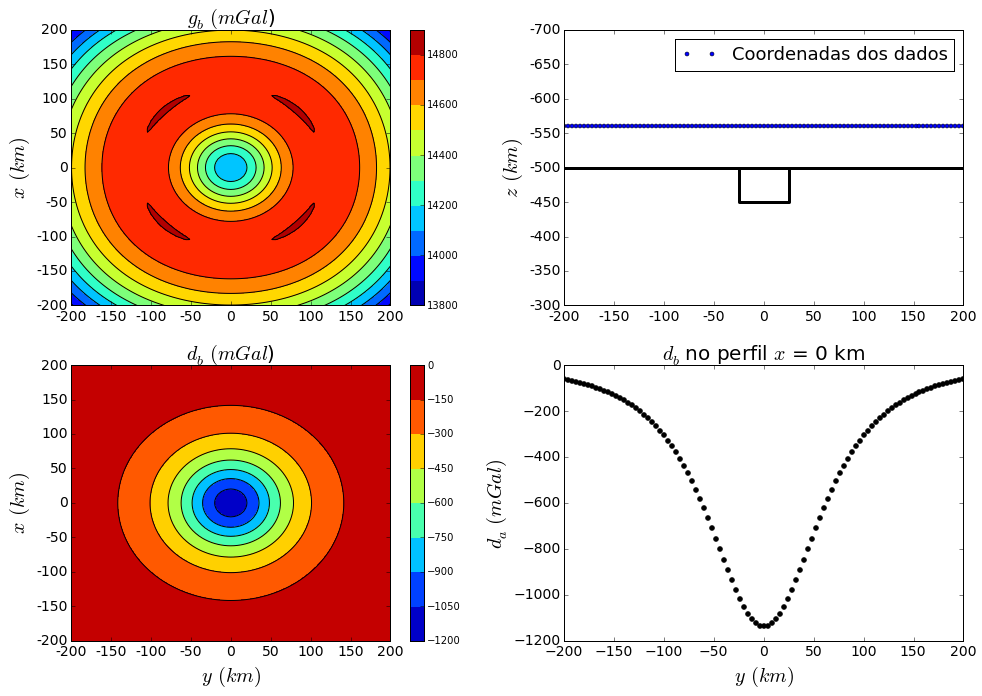

In [25]:
mpl.close('all')
mpl.figure(figsize=(14,10))

mpl.subplot(2,2,1)
mpl.title('$g_{b} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, gb, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, gb, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
#mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,2)
for i, p in enumerate(CB2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.plot(yp[perfil], zp[perfil], 'bo', markersize=4,
         label='Coordenadas dos dados')
mpl.xlim(area[2], area[3])
mpl.ylim(lambida+z0, -lambida+z0)
#mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='best', fontsize=18)
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title('$d_{b} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, db, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, db, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14, )
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,4)
mpl.title('$d_{b}$ no perfil $x$ = 0 km', fontsize=20)
mpl.plot(0.001*yp[perfil], db[perfil], 'ko', markersize=5)
mpl.paths([[0.001*area[2], 0.0]], [[0.001*area[3], 0.0]], 'k--')
mpl.xlim(0.001*area[2], 0.001*area[3])
#mpl.ylim(-lambida+z0, lambida+z0)
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$d_{a} \, (mGal)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)

mpl.tight_layout(pad=2)

### Componente $z$ (vertical) da aceleração gravitacional $g_{c}$ e distúrbio gravitacional $d_{c}$

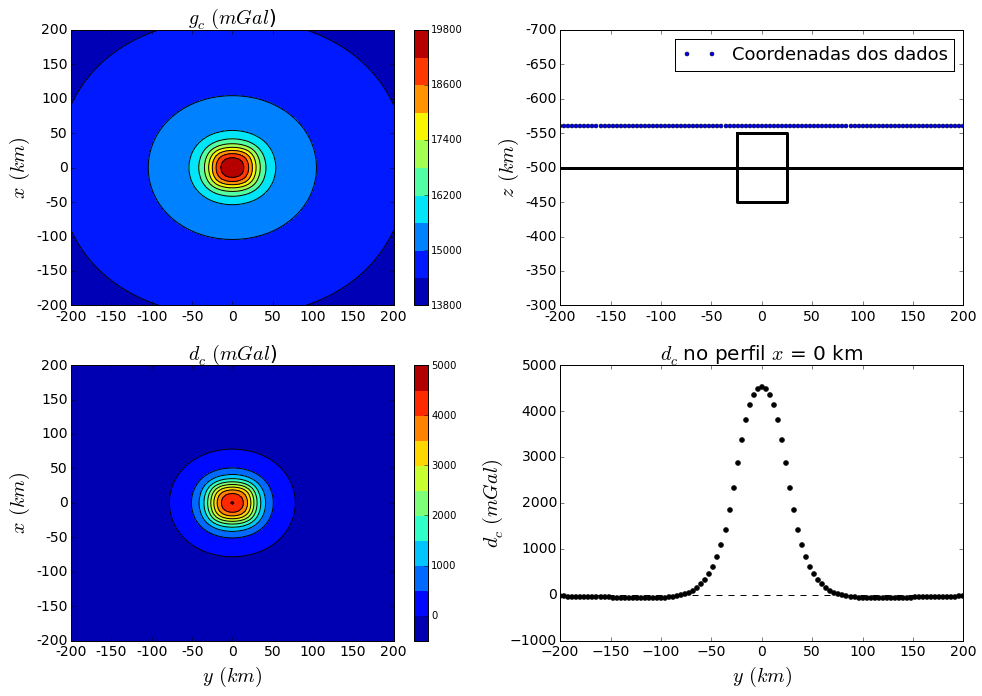

In [26]:
mpl.close('all')
mpl.figure(figsize=(14,10))

mpl.subplot(2,2,1)
mpl.title('$g_{c} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, gc, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, gc, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
#mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,2)
for i, p in enumerate(CC2D):
    mpl.polygon(p, style='-k', linewidth=3)
mpl.plot(yp[perfil], zp[perfil], 'bo', markersize=4,
         label='Coordenadas dos dados')
mpl.xlim(area[2], area[3])
mpl.ylim(lambida+z0, -lambida+z0)
#mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='best', fontsize=18)
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title('$d_{c} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, dc, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, dc, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14, )
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,4)
mpl.title('$d_{c}$ no perfil $x$ = 0 km', fontsize=20)
mpl.plot(0.001*yp[perfil], dc[perfil], 'ko', markersize=5)
mpl.paths([[0.001*area[2], 0.0]], [[0.001*area[3], 0.0]], 'k--')
mpl.xlim(0.001*area[2], 0.001*area[3])
#mpl.ylim(-lambida+z0, lambida+z0)
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$d_{c} \, (mGal)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)

mpl.tight_layout(pad=2)

## Efeito das massas topográficas

### Modelo da topografia do modelo CA

In [27]:
# modelo 3D
X1 = -0.5*la
X2 = 0.5*la
Y1 = -0.5*la
Y2 = 0.5*la
Z1 = z0-la
Z2 = z0

TA = [mesher.Prism(X1, X2, Y1, Y2, Z1, Z2, props={'density': rhoa})]

# modelo 2D
TA2D = [mesher.Polygon([[Y1, Z1], [Y2, Z1], [Y2, Z2], [Y1, Z2]])]

### Remoção da componente $z$ (vertical) da aceleração gravitacional exercida pela topografia do modelo CA. A topografia do modelo CA é representada pela massa anômala localizada na parte superior.

In [28]:
ta = prism.gz(xp, yp, zp, TA)

### Distúrbio gravitacional corrigido do efeito da topografia $d_{a}^{corr}$

In [29]:
dacorr = da - ta

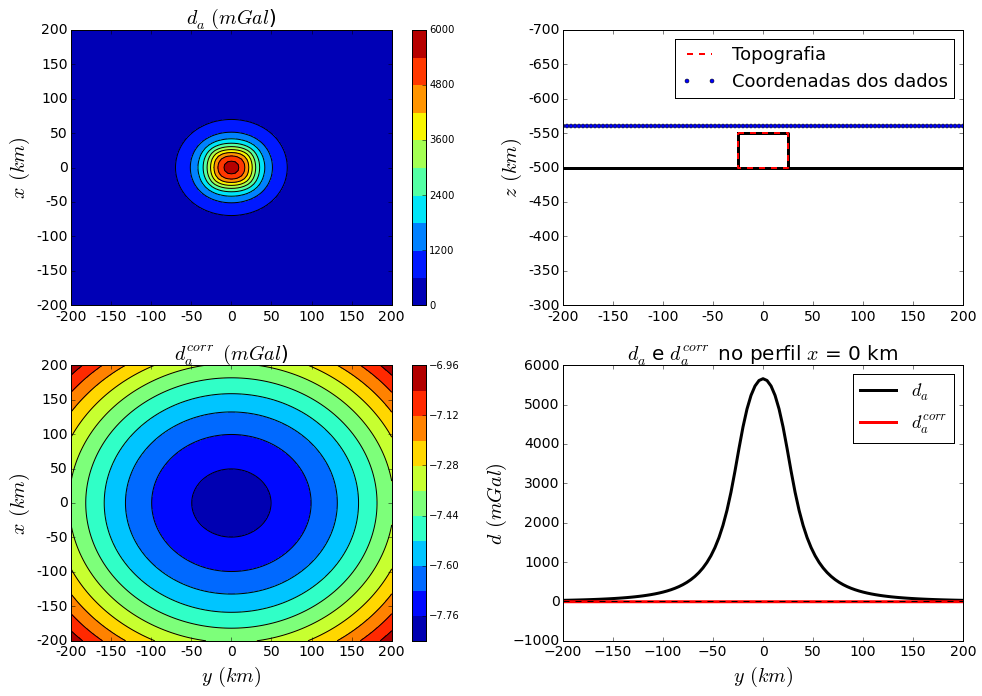

In [30]:
mpl.close('all')
mpl.figure(figsize=(14,10))

mpl.subplot(2,2,1)
mpl.title('$d_{a} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, da, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, da, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14, )
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,2)
for i, p in enumerate(CA2D):
    mpl.polygon(p, style='-k', linewidth=3)
for i, p in enumerate(TA2D):
    mpl.polygon(p, style='--r', linewidth=2, 
                label='Topografia')
mpl.plot(yp[perfil], zp[perfil], 'bo', markersize=4, 
         label='Coordenadas dos dados')
mpl.xlim(area[2], area[3])
mpl.ylim(lambida+z0, -lambida+z0)
#mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='best', fontsize=18)
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title('$d_{a}^{corr} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, dacorr, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, dacorr, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14, )
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,4)
mpl.title('$d_{a}$ e $d_{a}^{corr}$ no perfil $x$ = 0 km', fontsize=20)
mpl.plot(0.001*yp[perfil], da[perfil], 'k-', 
         linewidth=3, label='$d_{a}$')
mpl.plot(0.001*yp[perfil], dacorr[perfil], 'r-', 
         linewidth=3, label='$d_{a}^{corr}$')
mpl.paths([[0.001*area[2], 0.0]], [[0.001*area[3], 0.0]], 'k--')
mpl.xlim(0.001*area[2], 0.001*area[3])
#mpl.ylim(-lambida+z0, lambida+z0)
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$d \, (mGal)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='best', fontsize=18, numpoints=1)

mpl.tight_layout(pad=2)

### Observe que a remoção do efeito da topografia no modelo CA praticamente reduz o distúrbio gravitacional a zero

### Modelo da topografia do modelo CC

In [31]:
# modelo 3D
X1 = -0.5*lc
X2 = 0.5*lc
Y1 = -0.5*lc
Y2 = 0.5*lc
Z1 = z0-lc
Z2 = z0

TC = [mesher.Prism(X1, X2, Y1, Y2, Z1, Z2, props={'density': rhoc})]

# modelo 2D
TC2D = [mesher.Polygon([[Y1, Z1], [Y2, Z1], [Y2, Z2], [Y1, Z2]])]

### Remoção da componente $z$ (vertical) da aceleração gravitacional exercida pela topografia do modelo CC. A topografia do modelo CC é representada pela massa anômala localizada na parte superior.

In [32]:
tc = prism.gz(xp, yp, zp, TC)

### Distúrbio gravitacional corrigido do efeito da topografia $d_{c}^{corr}$

In [33]:
dccorr = dc - tc

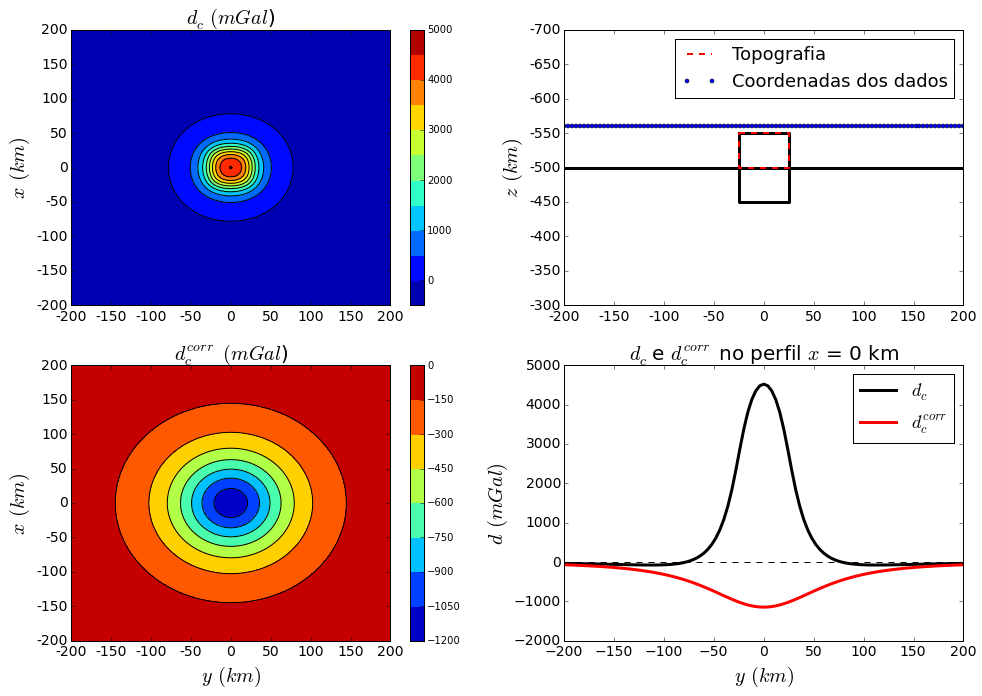

In [34]:
mpl.close('all')
mpl.figure(figsize=(14,10))

mpl.subplot(2,2,1)
mpl.title('$d_{c} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, dc, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, dc, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14, )
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,2)
for i, p in enumerate(CC2D):
    mpl.polygon(p, style='-k', linewidth=3)
for i, p in enumerate(TA2D):
    mpl.polygon(p, style='--r', linewidth=2, 
                label='Topografia')
mpl.plot(yp[perfil], zp[perfil], 'bo', markersize=4, 
         label='Coordenadas dos dados')
mpl.xlim(area[2], area[3])
mpl.ylim(lambida+z0, -lambida+z0)
#mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$z \, (km)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='best', fontsize=18)
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title('$d_{c}^{corr} \, (mGal$)', fontsize=20)
nlevels = mpl.contourf(yp, xp, dccorr, shape, 10)
mpl.colorbar()
mpl.contour(yp, xp, dccorr, shape, nlevels, color='k', 
            linewidth=1, clabel=False)
mpl.ylim(area[0], area[1])
mpl.xlim(area[2], area[3])
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$x \, (km)$', fontsize=20)
mpl.xticks(fontsize=14, )
mpl.yticks(fontsize=14)
mpl.m2km()

mpl.subplot(2,2,4)
mpl.title('$d_{c}$ e $d_{c}^{corr}$ no perfil $x$ = 0 km', fontsize=20)
mpl.plot(0.001*yp[perfil], dc[perfil], 'k-', 
         linewidth=3, label='$d_{c}$')
mpl.plot(0.001*yp[perfil], dccorr[perfil], 'r-', 
         linewidth=3, label='$d_{c}^{corr}$')
mpl.paths([[0.001*area[2], 0.0]], [[0.001*area[3], 0.0]], 'k--')
mpl.xlim(0.001*area[2], 0.001*area[3])
#mpl.ylim(-lambida+z0, lambida+z0)
mpl.xlabel('$y \, (km)$', fontsize=20)
mpl.ylabel('$d \, (mGal)$', fontsize=20)
mpl.xticks(fontsize=14)
mpl.yticks(fontsize=14)
mpl.legend(loc='best', fontsize=18, numpoints=1)

mpl.tight_layout(pad=2)

### Observe que a remoção do efeito da topografia no modelo CC resulta em um distúrbio gravitacional negativo. Isso se deve ao efeito produzido pela massa anômala negativa que está abaixo da massa anômala positiva no modelo CC.